In [1]:
from selenium import webdriver
from selenium.webdriver.common.by import By
import pandas as pd
from bs4 import BeautifulSoup
import requests
from selenium.webdriver.chrome.service import Service as ChromeService
from webdriver_manager.chrome import ChromeDriverManager
from time import sleep
import time
from random import randint
import cloudscraper

In [2]:
def export(results):
    df = pd.DataFrame(results)
    df.to_csv("job_results1.csv",mode='a',index=False,header=True)

In [224]:
info = []
for i in range(0,100):
    main_url = f"https://www.indeed.com/jobs?q=data+scientist&l=United+States&sort=date&filter=0&start={i*10}"
    
    main_scraper= cloudscraper.create_scraper()
    main_response = main_scraper.get(main_url)
    while(main_response.status_code!=200):
        main_scraper= cloudscraper.create_scraper()
        main_response = main_scraper.get(main_url)
    print(f"main_url response code for page {i+1} = {main_response.status_code}")
    
    bs = BeautifulSoup(main_response.text,'html.parser')
    #print(bs)
    jobs_list = bs.find('div',{'id':'mosaic-jobResults'})
    #print(job_list)
    
    jobs = jobs_list.find_all('div',{'class':'job_seen_beacon'})
    
    for j in range(len(jobs)):
        TITLE = jobs[j].find('h2',{'class':'jobTitle'})
        title = TITLE.text
        link1 = TITLE.find('a').attrs['data-jk']
        link2 = TITLE.find('a').attrs['data-mobtk']
        url = f'https://www.indeed.com/viewjob?jk={link1}&tk={link2}&from=serp&vjs=3'
        company_name = jobs[j].find('span',{'data-testid':'company-name'})
        company_name_text = company_name.text
        #print(company_name.text)
        company_location = jobs[j].find('div',{'data-testid':'text-location'})
        company_location_text = company_location.text
        test_scraper= cloudscraper.create_scraper()
        test_response = test_scraper.get(url)
        while(test_response.status_code!=200):
            test_scraper= cloudscraper.create_scraper()
            test_response = test_scraper.get(url)
        print(f"\t Response code for job {j+1} = {test_response.status_code}")
        soup = BeautifulSoup(test_response.text,'html.parser')
        try:
            job_details = soup.find('div',{'id':'salaryInfoAndJobType'})
            job_type_text= job_details.span.text
        except:
            job_type_text = "None"
        try:
            job_description = soup.find('div',{'id':'jobDescriptionText'})
            job_description_text = job_description.text
        except:
            job_description_text="None"
        data = {
            'Title':title,
            'Company': company_name_text,
            "Location": company_location_text,
            "Type of Positions": job_type_text,
            "Job Description": job_description_text
        }
        info.append(data)
    print(f"Appended page {i+1} successfully")
export(info)

main_url response code for page 1 = 200
	 Response code for job 1 = 200
	 Response code for job 2 = 200
	 Response code for job 3 = 200
	 Response code for job 4 = 200
	 Response code for job 5 = 200
	 Response code for job 6 = 200
	 Response code for job 7 = 200
	 Response code for job 8 = 200
	 Response code for job 9 = 200
	 Response code for job 10 = 200
	 Response code for job 11 = 200
	 Response code for job 12 = 200
	 Response code for job 13 = 200
	 Response code for job 14 = 200
	 Response code for job 15 = 200
	 Response code for job 16 = 200
	 Response code for job 17 = 200
	 Response code for job 18 = 200
	 Response code for job 19 = 200
	 Response code for job 20 = 200
	 Response code for job 21 = 200
	 Response code for job 22 = 200
	 Response code for job 23 = 200
	 Response code for job 24 = 200
	 Response code for job 25 = 200
Appended page 1 successfully
main_url response code for page 2 = 200
	 Response code for job 1 = 200
	 Response code for job 2 = 200
	 Response 

In [3]:
#export(info)

In [152]:
df = pd.read_csv('job_results1.csv')
df

,Title,Company,Location,Type of Positions,Job Description
0,Data Scientist - All Levels,Interclypse Inc,"San Antonio, TX",NaN,\n Description: \n Interclypse is seeking Dat...
1,Senior Data Engineer - Generative AI and Knowl...,SAP,"Hybrid remote in Palo Alto, CA 94304",Full-time,\nWe help the world run better\n Our company c...
2,"Staff Applied Scientist, Marketplace",ThredUp Inc.,"Hybrid remote in Oakland, CA 94607","$190,000 - $230,000 a year",\nAbout thredUP thredUP is transforming resale...
3,Principal Data Scientist,CEDENT,"Nashville, TN",NaN,\n- Role - Principal Data Scientist Location; ...
4,Prompt Engineer for Generative AI (chatbot and...,Vicarious Talent Agency,"Hybrid remote in Seattle, WA 98122",$35 - $55 an hour,"We are Vicarious, a talent agency that represe..."
...,...,...,...,...,...
1825,Senior Staff AI Data Engineer,Recruiting From Scratch,"Honolulu, HI 96804 (Downtown area)","$160,000 a year",\n\n\nWho is \nRecruiting from Scratch \n: \n\...
1826,Senior Staff AI Data Engineer,Recruiting From Scratch,"Antioch, CA 94509",Full-time,\n\n\nWho is \nRecruiting from Scratch \n: \n\...
1827,Senior Staff AI Data Engineer,Recruiting From Scratch,"Albuquerque, NM 87105",NaN,\n\n\nWho is \nRecruiting from Scratch \n: \n\...
1828,Senior Staff AI Data Engineer,Recruiting From Scratch,"Cypress, CA","$160,000 a year",\n\n\nWho is \nRecruiting from Scratch \n: \n\...


In [153]:
changed_df = df.fillna('Full-time',inplace=False)
changed_df.head()

,Title,Company,Location,Type of Positions,Job Description
0,Data Scientist - All Levels,Interclypse Inc,"San Antonio, TX",Full-time,\n Description: \n Interclypse is seeking Dat...
1,Senior Data Engineer - Generative AI and Knowl...,SAP,"Hybrid remote in Palo Alto, CA 94304",Full-time,\nWe help the world run better\n Our company c...
2,"Staff Applied Scientist, Marketplace",ThredUp Inc.,"Hybrid remote in Oakland, CA 94607","$190,000 - $230,000 a year",\nAbout thredUP thredUP is transforming resale...
3,Principal Data Scientist,CEDENT,"Nashville, TN",Full-time,\n- Role - Principal Data Scientist Location; ...
4,Prompt Engineer for Generative AI (chatbot and...,Vicarious Talent Agency,"Hybrid remote in Seattle, WA 98122",$35 - $55 an hour,"We are Vicarious, a talent agency that represe..."


In [154]:
changed_df['Salary'] = changed_df['Type of Positions'].copy()
changed_df.head()

,Title,Company,Location,Type of Positions,Job Description,Salary
0,Data Scientist - All Levels,Interclypse Inc,"San Antonio, TX",Full-time,\n Description: \n Interclypse is seeking Dat...,Full-time
1,Senior Data Engineer - Generative AI and Knowl...,SAP,"Hybrid remote in Palo Alto, CA 94304",Full-time,\nWe help the world run better\n Our company c...,Full-time
2,"Staff Applied Scientist, Marketplace",ThredUp Inc.,"Hybrid remote in Oakland, CA 94607","$190,000 - $230,000 a year",\nAbout thredUP thredUP is transforming resale...,"$190,000 - $230,000 a year"
3,Principal Data Scientist,CEDENT,"Nashville, TN",Full-time,\n- Role - Principal Data Scientist Location; ...,Full-time
4,Prompt Engineer for Generative AI (chatbot and...,Vicarious Talent Agency,"Hybrid remote in Seattle, WA 98122",$35 - $55 an hour,"We are Vicarious, a talent agency that represe...",$35 - $55 an hour


In [155]:
changed_df['Salary'] = changed_df['Salary'].replace('Full-time', 'None')
changed_df.head()

,Title,Company,Location,Type of Positions,Job Description,Salary
0,Data Scientist - All Levels,Interclypse Inc,"San Antonio, TX",Full-time,\n Description: \n Interclypse is seeking Dat...,None
1,Senior Data Engineer - Generative AI and Knowl...,SAP,"Hybrid remote in Palo Alto, CA 94304",Full-time,\nWe help the world run better\n Our company c...,None
2,"Staff Applied Scientist, Marketplace",ThredUp Inc.,"Hybrid remote in Oakland, CA 94607","$190,000 - $230,000 a year",\nAbout thredUP thredUP is transforming resale...,"$190,000 - $230,000 a year"
3,Principal Data Scientist,CEDENT,"Nashville, TN",Full-time,\n- Role - Principal Data Scientist Location; ...,None
4,Prompt Engineer for Generative AI (chatbot and...,Vicarious Talent Agency,"Hybrid remote in Seattle, WA 98122",$35 - $55 an hour,"We are Vicarious, a talent agency that represe...",$35 - $55 an hour


In [156]:
part_time_columns = changed_df.columns[changed_df.eq('Part-time').any()]
part_time_columns

Index(['Type of Positions', 'Salary'], dtype='object')

In [157]:
part_time_rows = changed_df[changed_df[['Type of Positions']].eq('Part-time').any(axis=1)]
part_time_rows

,Title,Company,Location,Type of Positions,Job Description,Salary
61,Research Assistant,Starkey Hearing Technologies,"Eden Prairie, MN 55344",Part-time,"\nAt Starkey, we are in the business of connec...",Part-time
99,Research Assistant,Starkey Hearing Technologies,"Eden Prairie, MN 55344",Part-time,"\nAt Starkey, we are in the business of connec...",Part-time


In [158]:
part_time_rows = changed_df[changed_df[['Type of Positions']].eq('Part-time, Full-time').any(axis=1)]
part_time_rows

,Title,Company,Location,Type of Positions,Job Description,Salary
319,Cloud Data Engineer - Active US Security Clear...,Deloitte,"Rosslyn, VA","Part-time, Full-time",\n\n\n\n\n\nPosition Summary \n\n\n\n\n\n\nClo...,"Part-time, Full-time"
1118,Data Scientist,"Spalding Consulting, Inc.","Remote in Patuxent River, MD","Part-time, Full-time","Spalding Consulting, Inc. is seeking a Data Sc...","Part-time, Full-time"
1125,Clinical Data Tagging Contractor: Speech Language,Amplio,Remote,"Part-time, Full-time",\nOverview: This document specifies the needs ...,"Part-time, Full-time"


In [159]:
part_time_rows = changed_df[changed_df[['Type of Positions']].eq('Contract').any(axis=1)]
part_time_rows

,Title,Company,Location,Type of Positions,Job Description,Salary
160,Data Scientist,ASK Consulting,"Oceanside, CA",Contract,\n\n\n\n\n\nJob Type:Contract \n\nPosted 2 day...,Contract
185,Machine Learning Engineer,Exodus Integrity Services,"Remote in Cleveland, OH",Contract,"\n\n\n\n\n\n Cleveland, OH\n \n\n\n\n\n...",Contract
193,Data Scientist,ASK Consulting,"Oceanside, CA",Contract,\n\n\n\n\n\nJob Type:Contract \n\nPosted 2 day...,Contract
204,AI Developer,ASK Consulting,"Hybrid remote in Houston, TX",Contract,\n\n\n\n\n\nJob Type:Contract \n\nPosted 2 day...,Contract
216,"Data Scientist (Contract, Hybrid)",TCC Solutions,"Hybrid remote in Tallahassee, FL 32301",Contract,\n\n\n\nType: Contract Duration: 6 months with...,Contract
229,Machine Learning Engineer,Exodus Integrity Services,"Remote in Cleveland, OH",Contract,"\n\n\n\n\n\n Cleveland, OH\n \n\n\n\n\n...",Contract
230,Machine Learning Engineer,Exodus Integrity Services,"Remote in Cleveland, OH",Contract,"\n\n\n\n\n\n Cleveland, OH\n \n\n\n\n\n...",Contract
256,"Associate Director, Data & Analytics",Servier,"Hybrid remote in Boston, MA 02210",Contract,"\n\n\n\n\n\nDate posted: Nov 17, 2023 \n \n...",Contract
270,"Associate Director, Data & Analytics",Servier,"Hybrid remote in Boston, MA 02210",Contract,"\n\n\n\n\n\nDate posted: Nov 17, 2023 \n \n...",Contract
297,Principal Data Scientist,Teamware Solutions (quantum leap consulting).,Remote,Contract,Role: Principal Data Scientist\nLocation : Bel...,Contract


In [160]:
changed_df['Salary'] = changed_df['Salary'].replace('Part-time', 'None')
changed_df['Salary'] = changed_df['Salary'].replace('Contract', 'None')
changed_df.head()

,Title,Company,Location,Type of Positions,Job Description,Salary
0,Data Scientist - All Levels,Interclypse Inc,"San Antonio, TX",Full-time,\n Description: \n Interclypse is seeking Dat...,None
1,Senior Data Engineer - Generative AI and Knowl...,SAP,"Hybrid remote in Palo Alto, CA 94304",Full-time,\nWe help the world run better\n Our company c...,None
2,"Staff Applied Scientist, Marketplace",ThredUp Inc.,"Hybrid remote in Oakland, CA 94607","$190,000 - $230,000 a year",\nAbout thredUP thredUP is transforming resale...,"$190,000 - $230,000 a year"
3,Principal Data Scientist,CEDENT,"Nashville, TN",Full-time,\n- Role - Principal Data Scientist Location; ...,None
4,Prompt Engineer for Generative AI (chatbot and...,Vicarious Talent Agency,"Hybrid remote in Seattle, WA 98122",$35 - $55 an hour,"We are Vicarious, a talent agency that represe...",$35 - $55 an hour


In [162]:
part_time_rows = changed_df[changed_df[['Type of Positions']].eq('Contract').any(axis=1)]
part_time_rows


,Title,Company,Location,Type of Positions,Job Description,Salary
160,Data Scientist,ASK Consulting,"Oceanside, CA",Contract,\n\n\n\n\n\nJob Type:Contract \n\nPosted 2 day...,None
185,Machine Learning Engineer,Exodus Integrity Services,"Remote in Cleveland, OH",Contract,"\n\n\n\n\n\n Cleveland, OH\n \n\n\n\n\n...",None
193,Data Scientist,ASK Consulting,"Oceanside, CA",Contract,\n\n\n\n\n\nJob Type:Contract \n\nPosted 2 day...,None
204,AI Developer,ASK Consulting,"Hybrid remote in Houston, TX",Contract,\n\n\n\n\n\nJob Type:Contract \n\nPosted 2 day...,None
216,"Data Scientist (Contract, Hybrid)",TCC Solutions,"Hybrid remote in Tallahassee, FL 32301",Contract,\n\n\n\nType: Contract Duration: 6 months with...,None
229,Machine Learning Engineer,Exodus Integrity Services,"Remote in Cleveland, OH",Contract,"\n\n\n\n\n\n Cleveland, OH\n \n\n\n\n\n...",None
230,Machine Learning Engineer,Exodus Integrity Services,"Remote in Cleveland, OH",Contract,"\n\n\n\n\n\n Cleveland, OH\n \n\n\n\n\n...",None
256,"Associate Director, Data & Analytics",Servier,"Hybrid remote in Boston, MA 02210",Contract,"\n\n\n\n\n\nDate posted: Nov 17, 2023 \n \n...",None
270,"Associate Director, Data & Analytics",Servier,"Hybrid remote in Boston, MA 02210",Contract,"\n\n\n\n\n\nDate posted: Nov 17, 2023 \n \n...",None
297,Principal Data Scientist,Teamware Solutions (quantum leap consulting).,Remote,Contract,Role: Principal Data Scientist\nLocation : Bel...,None


In [143]:
changed_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1830 entries, 0 to 1829
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Title              1830 non-null   object
 1   Company            1830 non-null   object
 2   Location           1830 non-null   object
 3   Type of Positions  1830 non-null   object
 4   Job Description    1830 non-null   object
 5   Salary             1830 non-null   object
dtypes: object(6)
memory usage: 85.9+ KB


In [163]:
non_none_rows = changed_df[changed_df["Salary"]!="None"]
(non_none_rows)

,Title,Company,Location,Type of Positions,Job Description,Salary
2,"Staff Applied Scientist, Marketplace",ThredUp Inc.,"Hybrid remote in Oakland, CA 94607","$190,000 - $230,000 a year",\nAbout thredUP thredUP is transforming resale...,"$190,000 - $230,000 a year"
4,Prompt Engineer for Generative AI (chatbot and...,Vicarious Talent Agency,"Hybrid remote in Seattle, WA 98122",$35 - $55 an hour,"We are Vicarious, a talent agency that represe...",$35 - $55 an hour
5,Data Systems Analyst/Architect,General Dynamics Information Technology,Remote in Indiana,"$104,000 - $156,000 a year",Clearance Level None Category Data Science Loc...,"$104,000 - $156,000 a year"
11,AIOps Principle Data Scientist,CVS Health,"Hartford, CT","$140,000 - $280,000 a year",\nBring your heart to CVS Health. Every one of...,"$140,000 - $280,000 a year"
12,Sr. Data Scientist,Altak Group,Remote,$68 - $72 an hour,Job Summary:\nWe are seeking an experienced Da...,$68 - $72 an hour
...,...,...,...,...,...,...
1822,Senior Staff AI Data Engineer,Recruiting From Scratch,"Fort Worth, TX","$160,000 a year",\n\n\nWho is \nRecruiting from Scratch \n: \n\...,"$160,000 a year"
1823,Senior Staff AI Data Engineer,Recruiting From Scratch,"Littleton, CO 80123","$160,000 a year",\n\n\nWho is \nRecruiting from Scratch \n: \n\...,"$160,000 a year"
1825,Senior Staff AI Data Engineer,Recruiting From Scratch,"Honolulu, HI 96804 (Downtown area)","$160,000 a year",\n\n\nWho is \nRecruiting from Scratch \n: \n\...,"$160,000 a year"
1828,Senior Staff AI Data Engineer,Recruiting From Scratch,"Cypress, CA","$160,000 a year",\n\n\nWho is \nRecruiting from Scratch \n: \n\...,"$160,000 a year"


In [41]:
def get_salary(x):
    y = x.split(' ')
    y = y[0].split('-')
    return y[0]

#print(get_salary('$160,000 a year'))


def hourly_to_yearly(x):
    if(len(x)==3):
        salary = int(x[1:])*2000
        if(len(str(salary))==5):
            str_salary = '$'+str(salary)[0:2]+','+str(salary)[2:]
        elif(len(str(salary))==6):
            str_salary = '$' + str(salary)[0:3] + ',' + str(salary)[3:]
        return str_salary
    else:
        return x

print(hourly_to_yearly('$68.23'))


$68.23


In [165]:
changed_df.loc[non_none_rows.index, 'Salary'] = non_none_rows['Salary'].apply(get_salary)
changed_df

,Title,Company,Location,Type of Positions,Job Description,Salary
0,Data Scientist - All Levels,Interclypse Inc,"San Antonio, TX",Full-time,\n Description: \n Interclypse is seeking Dat...,None
1,Senior Data Engineer - Generative AI and Knowl...,SAP,"Hybrid remote in Palo Alto, CA 94304",Full-time,\nWe help the world run better\n Our company c...,None
2,"Staff Applied Scientist, Marketplace",ThredUp Inc.,"Hybrid remote in Oakland, CA 94607","$190,000 - $230,000 a year",\nAbout thredUP thredUP is transforming resale...,"$190,000"
3,Principal Data Scientist,CEDENT,"Nashville, TN",Full-time,\n- Role - Principal Data Scientist Location; ...,None
4,Prompt Engineer for Generative AI (chatbot and...,Vicarious Talent Agency,"Hybrid remote in Seattle, WA 98122",$35 - $55 an hour,"We are Vicarious, a talent agency that represe...",$35
...,...,...,...,...,...,...
1825,Senior Staff AI Data Engineer,Recruiting From Scratch,"Honolulu, HI 96804 (Downtown area)","$160,000 a year",\n\n\nWho is \nRecruiting from Scratch \n: \n\...,"$160,000"
1826,Senior Staff AI Data Engineer,Recruiting From Scratch,"Antioch, CA 94509",Full-time,\n\n\nWho is \nRecruiting from Scratch \n: \n\...,None
1827,Senior Staff AI Data Engineer,Recruiting From Scratch,"Albuquerque, NM 87105",Full-time,\n\n\nWho is \nRecruiting from Scratch \n: \n\...,None
1828,Senior Staff AI Data Engineer,Recruiting From Scratch,"Cypress, CA","$160,000 a year",\n\n\nWho is \nRecruiting from Scratch \n: \n\...,"$160,000"


In [166]:
non_none_rows = changed_df[changed_df["Salary"]!="None"]
changed_df.loc[non_none_rows.index, 'Salary'] = non_none_rows['Salary'].apply(hourly_to_yearly)
changed_df.head()

,Title,Company,Location,Type of Positions,Job Description,Salary
0,Data Scientist - All Levels,Interclypse Inc,"San Antonio, TX",Full-time,\n Description: \n Interclypse is seeking Dat...,None
1,Senior Data Engineer - Generative AI and Knowl...,SAP,"Hybrid remote in Palo Alto, CA 94304",Full-time,\nWe help the world run better\n Our company c...,None
2,"Staff Applied Scientist, Marketplace",ThredUp Inc.,"Hybrid remote in Oakland, CA 94607","$190,000 - $230,000 a year",\nAbout thredUP thredUP is transforming resale...,"$190,000"
3,Principal Data Scientist,CEDENT,"Nashville, TN",Full-time,\n- Role - Principal Data Scientist Location; ...,None
4,Prompt Engineer for Generative AI (chatbot and...,Vicarious Talent Agency,"Hybrid remote in Seattle, WA 98122",$35 - $55 an hour,"We are Vicarious, a talent agency that represe...","$70,000"


In [167]:
changed_df

,Title,Company,Location,Type of Positions,Job Description,Salary
0,Data Scientist - All Levels,Interclypse Inc,"San Antonio, TX",Full-time,\n Description: \n Interclypse is seeking Dat...,None
1,Senior Data Engineer - Generative AI and Knowl...,SAP,"Hybrid remote in Palo Alto, CA 94304",Full-time,\nWe help the world run better\n Our company c...,None
2,"Staff Applied Scientist, Marketplace",ThredUp Inc.,"Hybrid remote in Oakland, CA 94607","$190,000 - $230,000 a year",\nAbout thredUP thredUP is transforming resale...,"$190,000"
3,Principal Data Scientist,CEDENT,"Nashville, TN",Full-time,\n- Role - Principal Data Scientist Location; ...,None
4,Prompt Engineer for Generative AI (chatbot and...,Vicarious Talent Agency,"Hybrid remote in Seattle, WA 98122",$35 - $55 an hour,"We are Vicarious, a talent agency that represe...","$70,000"
...,...,...,...,...,...,...
1825,Senior Staff AI Data Engineer,Recruiting From Scratch,"Honolulu, HI 96804 (Downtown area)","$160,000 a year",\n\n\nWho is \nRecruiting from Scratch \n: \n\...,"$160,000"
1826,Senior Staff AI Data Engineer,Recruiting From Scratch,"Antioch, CA 94509",Full-time,\n\n\nWho is \nRecruiting from Scratch \n: \n\...,None
1827,Senior Staff AI Data Engineer,Recruiting From Scratch,"Albuquerque, NM 87105",Full-time,\n\n\nWho is \nRecruiting from Scratch \n: \n\...,None
1828,Senior Staff AI Data Engineer,Recruiting From Scratch,"Cypress, CA","$160,000 a year",\n\n\nWho is \nRecruiting from Scratch \n: \n\...,"$160,000"


In [171]:
def clean_positions(position):
    valid_values = ["Full-time", "Part-time", "Part-time, Full-time","Contract"]
    if position not in valid_values:
        return 'Full-time'
    return position

# Apply the function to the 'Type of Positions' column
changed_df['Type of Positions'] = changed_df['Type of Positions'].apply(clean_positions)

In [180]:
part_time_rows = changed_df[changed_df[['Type of Positions']].eq('Contract').any(axis=1)]
part_time_rows


,Title,Company,Location,Type of Positions,Job Description,Salary
160,Data Scientist,ASK Consulting,"Oceanside, CA",Contract,\n\n\n\n\n\nJob Type:Contract \n\nPosted 2 day...,None
185,Machine Learning Engineer,Exodus Integrity Services,"Remote in Cleveland, OH",Contract,"\n\n\n\n\n\n Cleveland, OH\n \n\n\n\n\n...",None
193,Data Scientist,ASK Consulting,"Oceanside, CA",Contract,\n\n\n\n\n\nJob Type:Contract \n\nPosted 2 day...,None
204,AI Developer,ASK Consulting,"Hybrid remote in Houston, TX",Contract,\n\n\n\n\n\nJob Type:Contract \n\nPosted 2 day...,None
216,"Data Scientist (Contract, Hybrid)",TCC Solutions,"Hybrid remote in Tallahassee, FL 32301",Contract,\n\n\n\nType: Contract Duration: 6 months with...,None
229,Machine Learning Engineer,Exodus Integrity Services,"Remote in Cleveland, OH",Contract,"\n\n\n\n\n\n Cleveland, OH\n \n\n\n\n\n...",None
230,Machine Learning Engineer,Exodus Integrity Services,"Remote in Cleveland, OH",Contract,"\n\n\n\n\n\n Cleveland, OH\n \n\n\n\n\n...",None
256,"Associate Director, Data & Analytics",Servier,"Hybrid remote in Boston, MA 02210",Contract,"\n\n\n\n\n\nDate posted: Nov 17, 2023 \n \n...",None
270,"Associate Director, Data & Analytics",Servier,"Hybrid remote in Boston, MA 02210",Contract,"\n\n\n\n\n\nDate posted: Nov 17, 2023 \n \n...",None
297,Principal Data Scientist,Teamware Solutions (quantum leap consulting).,Remote,Contract,Role: Principal Data Scientist\nLocation : Bel...,None


In [182]:
changed_df.to_csv('job_results1_semi_cleaned.csv',index=False)

In [350]:
semi_df = pd.read_csv('job_results1_semi_cleaned.csv')
semi_df.head()

,Title,Company,Location,Type of Positions,Job Description,Salary
0,Data Scientist - All Levels,Interclypse Inc,"San Antonio, TX",Full-time,\n Description: \n Interclypse is seeking Dat...,NaN
1,Senior Data Engineer - Generative AI and Knowl...,SAP,"Hybrid remote in Palo Alto, CA 94304",Full-time,\nWe help the world run better\n Our company c...,NaN
2,"Staff Applied Scientist, Marketplace",ThredUp Inc.,"Hybrid remote in Oakland, CA 94607",Full-time,\nAbout thredUP thredUP is transforming resale...,"$190,000"
3,Principal Data Scientist,CEDENT,"Nashville, TN",Full-time,\n- Role - Principal Data Scientist Location; ...,NaN
4,Prompt Engineer for Generative AI (chatbot and...,Vicarious Talent Agency,"Hybrid remote in Seattle, WA 98122",Full-time,"We are Vicarious, a talent agency that represe...","$70,000"


In [202]:
def get_state(x):
    y = x.split(',')
    if len(y)>1:
        return y[1].split()[0]
    elif len(y)==1:
        return y[0].split()[0]

print(get_state('San Antonio, TX'))

TX


In [206]:
semi_df['Location'] = semi_df['Location'].apply(get_state)
semi_df

,Title,Company,Location,Type of Positions,Job Description,Salary
0,Data Scientist - All Levels,Interclypse Inc,TX,Full-time,\n Description: \n Interclypse is seeking Dat...,NaN
1,Senior Data Engineer - Generative AI and Knowl...,SAP,CA,Full-time,\nWe help the world run better\n Our company c...,NaN
2,"Staff Applied Scientist, Marketplace",ThredUp Inc.,CA,Full-time,\nAbout thredUP thredUP is transforming resale...,"$190,000"
3,Principal Data Scientist,CEDENT,TN,Full-time,\n- Role - Principal Data Scientist Location; ...,NaN
4,Prompt Engineer for Generative AI (chatbot and...,Vicarious Talent Agency,WA,Full-time,"We are Vicarious, a talent agency that represe...","$70,000"
...,...,...,...,...,...,...
1825,Senior Staff AI Data Engineer,Recruiting From Scratch,HI,Full-time,\n\n\nWho is \nRecruiting from Scratch \n: \n\...,"$160,000"
1826,Senior Staff AI Data Engineer,Recruiting From Scratch,CA,Full-time,\n\n\nWho is \nRecruiting from Scratch \n: \n\...,NaN
1827,Senior Staff AI Data Engineer,Recruiting From Scratch,NM,Full-time,\n\n\nWho is \nRecruiting from Scratch \n: \n\...,NaN
1828,Senior Staff AI Data Engineer,Recruiting From Scratch,CA,Full-time,\n\n\nWho is \nRecruiting from Scratch \n: \n\...,"$160,000"


In [208]:
semi_df.to_csv('job_results1_cleaned.csv',index=False)


In [210]:
sub_final_df = pd.read_csv('job_results1_cleaned.csv')
sub_final_df.head(10)

,Title,Company,Location,Type of Positions,Job Description,Salary
0,Data Scientist - All Levels,Interclypse Inc,TX,Full-time,\n Description: \n Interclypse is seeking Dat...,NaN
1,Senior Data Engineer - Generative AI and Knowl...,SAP,CA,Full-time,\nWe help the world run better\n Our company c...,NaN
2,"Staff Applied Scientist, Marketplace",ThredUp Inc.,CA,Full-time,\nAbout thredUP thredUP is transforming resale...,"$190,000"
3,Principal Data Scientist,CEDENT,TN,Full-time,\n- Role - Principal Data Scientist Location; ...,NaN
4,Prompt Engineer for Generative AI (chatbot and...,Vicarious Talent Agency,WA,Full-time,"We are Vicarious, a talent agency that represe...","$70,000"
5,Data Systems Analyst/Architect,General Dynamics Information Technology,Remote,Full-time,Clearance Level None Category Data Science Loc...,"$104,000"
6,"Director, Statistics (Pipeline)",ABBVIE,United,Full-time,\n\nProtocols: Directs the development of stat...,NaN
7,Software ML Engineer (MSO),Apple,CA,Full-time,"\n\n\n\nSummary\n\n\n Posted: Oct 19, 202...",NaN
8,Senior Machine Learning Engineer - System Expe...,Apple,CA,Full-time,"\n\n\n\nSummary\n\n\n Posted: Oct 19, 202...",NaN
9,Artificial Intelligence Program Manager,Deloitte,KY,Full-time,\nDigital Supply Chain Strategy- Artificial In...,NaN


In [285]:
part_time_rows = sub_final_df[sub_final_df[['Location']].eq('Wisconsin').any(axis=1)]
part_time_rows


,Title,Company,Location,Type of Positions,Job Description,Salary


In [286]:
sub_final_df['Location'][1030] = 'WI'

In [287]:
sub_final_df.to_csv('job_results1_cleaned.csv',index=False)

In [105]:
final_df = pd.read_csv('job_results1_cleaned.csv')


In [106]:
final_df.shape

(1830, 6)

In [107]:
part_time_rows = final_df[final_df[['Type of Positions']].eq('Part-time, Full-time').any(axis=1)]
part_time_rows

,Title,Company,Location,Type of Positions,Job Description,Salary
319,Cloud Data Engineer - Active US Security Clear...,Deloitte,VA,"Part-time, Full-time",\n\n\n\n\n\nPosition Summary \n\n\n\n\n\n\nClo...,Part
1118,Data Scientist,"Spalding Consulting, Inc.",MD,"Part-time, Full-time","Spalding Consulting, Inc. is seeking a Data Sc...",Part
1125,Clinical Data Tagging Contractor: Speech Language,Amplio,Remote,"Part-time, Full-time",\nOverview: This document specifies the needs ...,Part


<Axes: xlabel='Company'>

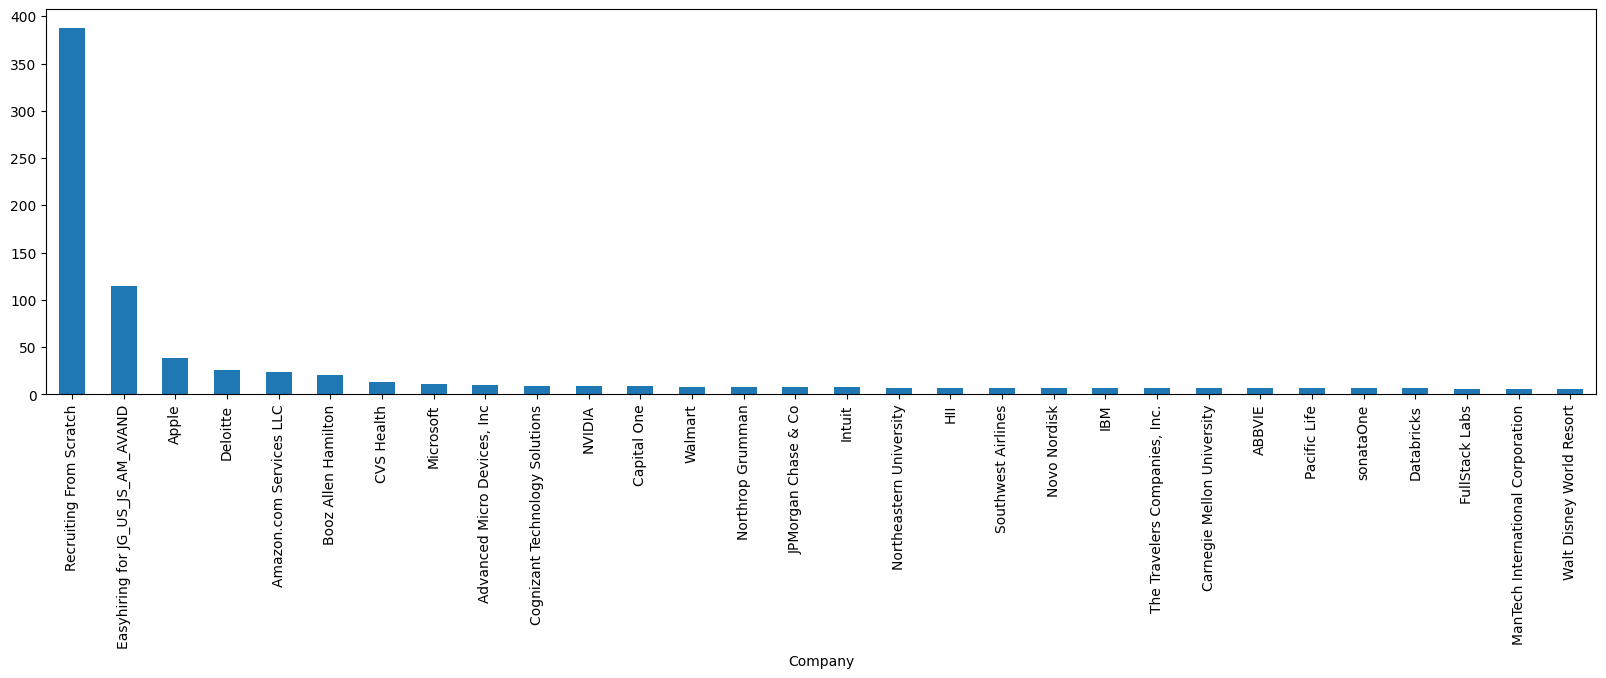

In [108]:
## find companies with highest number of job postings
import matplotlib.pyplot as plt
counts = final_df.groupby("Company").count()['Title'].sort_values(ascending=False)[:30]
counts.plot(kind="bar",figsize=(20,5))

<Axes: xlabel='Location'>

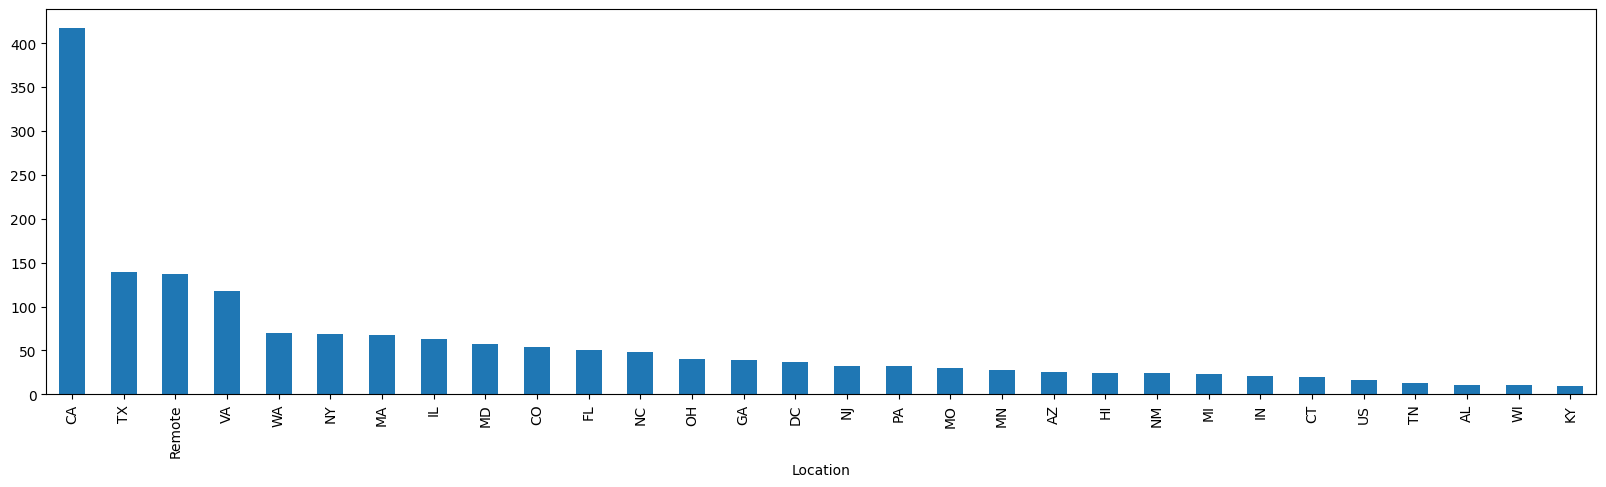

In [109]:
## Find the locataions with highest number of jobs
location_counts = final_df.groupby("Location").count()['Title'].sort_values(ascending=False)[:30]
location_counts.plot(kind='bar',figsize=(20,5))

In [110]:
def con_to_num(row):
    try:
        x = row.split(',')
        y = x[0][1:]+x[1]
        return int(y)
    except:
        return row

print(con_to_num('$70,000'))

70000


In [111]:
def hourly_to_yearly(x):
    try:
        if('.' in x):
            salary = int(float(x[1:])*2000)
            if(len(str(salary))==5):
                str_salary = '$'+str(salary)[0:2]+','+str(salary)[2:]
            elif(len(str(salary))==6):
                str_salary = '$' + str(salary)[0:3] + ',' + str(salary)[3:]
            return str_salary
        elif(',' in x):
            return x
    except:
        return x

print(hourly_to_yearly('$68.23'))

$136,460


In [112]:
final_df['Salary'] = final_df['Salary'].apply(hourly_to_yearly)
final_df

,Title,Company,Location,Type of Positions,Job Description,Salary
0,Data Scientist - All Levels,Interclypse Inc,TX,Full-time,\n Description: \n Interclypse is seeking Dat...,NaN
1,Senior Data Engineer - Generative AI and Knowl...,SAP,CA,Full-time,\nWe help the world run better\n Our company c...,NaN
2,"Staff Applied Scientist, Marketplace",ThredUp Inc.,CA,Full-time,\nAbout thredUP thredUP is transforming resale...,"$190,000"
3,Principal Data Scientist,CEDENT,TN,Full-time,\n- Role - Principal Data Scientist Location; ...,NaN
4,Prompt Engineer for Generative AI (chatbot and...,Vicarious Talent Agency,WA,Full-time,"We are Vicarious, a talent agency that represe...","$70,000"
...,...,...,...,...,...,...
1825,Senior Staff AI Data Engineer,Recruiting From Scratch,HI,Full-time,\n\n\nWho is \nRecruiting from Scratch \n: \n\...,"$160,000"
1826,Senior Staff AI Data Engineer,Recruiting From Scratch,CA,Full-time,\n\n\nWho is \nRecruiting from Scratch \n: \n\...,NaN
1827,Senior Staff AI Data Engineer,Recruiting From Scratch,NM,Full-time,\n\n\nWho is \nRecruiting from Scratch \n: \n\...,NaN
1828,Senior Staff AI Data Engineer,Recruiting From Scratch,CA,Full-time,\n\n\nWho is \nRecruiting from Scratch \n: \n\...,"$160,000"


In [113]:
final_df['Salary'] = final_df['Salary'].apply(con_to_num)
final_df

,Title,Company,Location,Type of Positions,Job Description,Salary
0,Data Scientist - All Levels,Interclypse Inc,TX,Full-time,\n Description: \n Interclypse is seeking Dat...,NaN
1,Senior Data Engineer - Generative AI and Knowl...,SAP,CA,Full-time,\nWe help the world run better\n Our company c...,NaN
2,"Staff Applied Scientist, Marketplace",ThredUp Inc.,CA,Full-time,\nAbout thredUP thredUP is transforming resale...,190000
3,Principal Data Scientist,CEDENT,TN,Full-time,\n- Role - Principal Data Scientist Location; ...,NaN
4,Prompt Engineer for Generative AI (chatbot and...,Vicarious Talent Agency,WA,Full-time,"We are Vicarious, a talent agency that represe...",70000
...,...,...,...,...,...,...
1825,Senior Staff AI Data Engineer,Recruiting From Scratch,HI,Full-time,\n\n\nWho is \nRecruiting from Scratch \n: \n\...,160000
1826,Senior Staff AI Data Engineer,Recruiting From Scratch,CA,Full-time,\n\n\nWho is \nRecruiting from Scratch \n: \n\...,NaN
1827,Senior Staff AI Data Engineer,Recruiting From Scratch,NM,Full-time,\n\n\nWho is \nRecruiting from Scratch \n: \n\...,NaN
1828,Senior Staff AI Data Engineer,Recruiting From Scratch,CA,Full-time,\n\n\nWho is \nRecruiting from Scratch \n: \n\...,160000


<Axes: xlabel='Salary'>

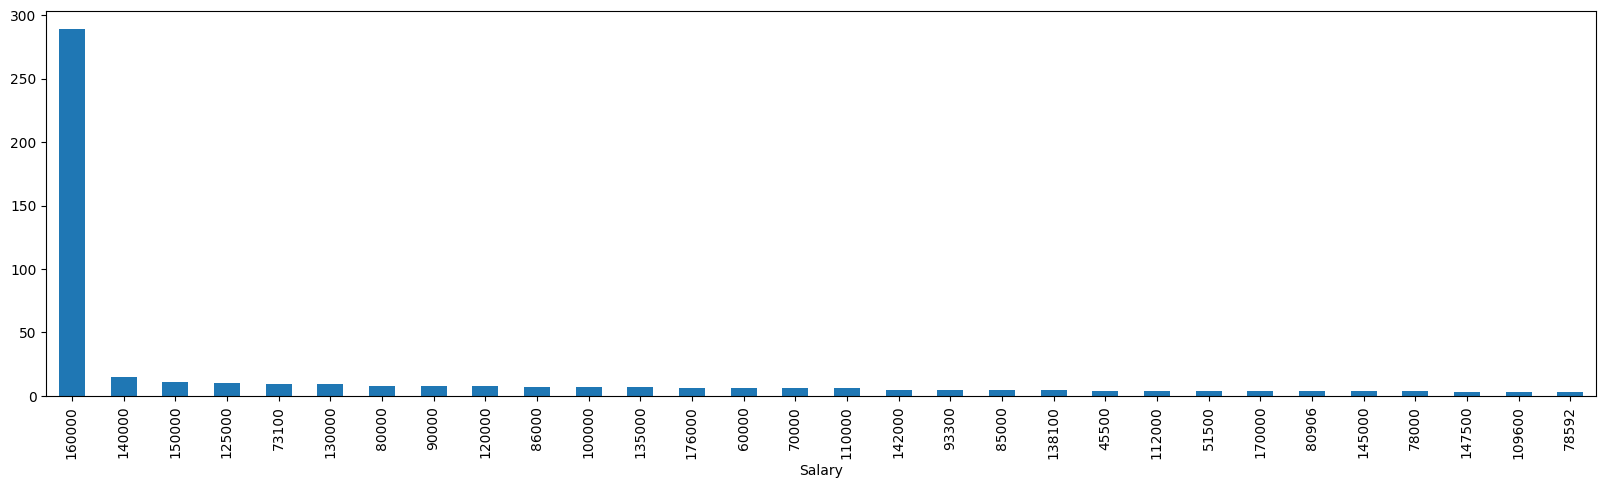

In [114]:
salary_counts = final_df.groupby("Salary").count()['Title'].sort_values(ascending=False)[:30]
salary_counts.plot(kind='bar',figsize=(20,5))

In [120]:
filtered_df = final_df.dropna(subset=['Salary'])


,Title,Company,Location,Type of Positions,Job Description,Salary
2,"Staff Applied Scientist, Marketplace",ThredUp Inc.,CA,Full-time,\nAbout thredUP thredUP is transforming resale...,190000
4,Prompt Engineer for Generative AI (chatbot and...,Vicarious Talent Agency,WA,Full-time,"We are Vicarious, a talent agency that represe...",70000
5,Data Systems Analyst/Architect,General Dynamics Information Technology,Remote,Full-time,Clearance Level None Category Data Science Loc...,104000
11,AIOps Principle Data Scientist,CVS Health,CT,Full-time,\nBring your heart to CVS Health. Every one of...,140000
12,Sr. Data Scientist,Altak Group,Remote,Full-time,Job Summary:\nWe are seeking an experienced Da...,136000
...,...,...,...,...,...,...
1822,Senior Staff AI Data Engineer,Recruiting From Scratch,TX,Full-time,\n\n\nWho is \nRecruiting from Scratch \n: \n\...,160000
1823,Senior Staff AI Data Engineer,Recruiting From Scratch,CO,Full-time,\n\n\nWho is \nRecruiting from Scratch \n: \n\...,160000
1825,Senior Staff AI Data Engineer,Recruiting From Scratch,HI,Full-time,\n\n\nWho is \nRecruiting from Scratch \n: \n\...,160000
1828,Senior Staff AI Data Engineer,Recruiting From Scratch,CA,Full-time,\n\n\nWho is \nRecruiting from Scratch \n: \n\...,160000


In [149]:
filtered_df['Salary'] = pd.to_numeric(filtered_df['Salary'], errors='coerce')


/var/folders/r1/qkgmsj6s3v5714p5mm648mc00000gn/T/ipykernel_2104/2618397729.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Salary'] = pd.to_numeric(filtered_df['Salary'], errors='coerce')


In [150]:
filtered_df.to_csv('job_results_cleaned.csv', index=False)

In [237]:
analyse_df = pd.read_csv('job_results_cleaned.csv')
analyse_df

,Title,Company,Location,Type of Positions,Job Description,Salary
0,"Staff Applied Scientist, Marketplace",ThredUp Inc.,CA,Full-time,\nAbout thredUP thredUP is transforming resale...,190000.0
1,Prompt Engineer for Generative AI (chatbot and...,Vicarious Talent Agency,WA,Full-time,"We are Vicarious, a talent agency that represe...",70000.0
2,Data Systems Analyst/Architect,General Dynamics Information Technology,Remote,Full-time,Clearance Level None Category Data Science Loc...,104000.0
3,AIOps Principle Data Scientist,CVS Health,CT,Full-time,\nBring your heart to CVS Health. Every one of...,140000.0
4,Sr. Data Scientist,Altak Group,Remote,Full-time,Job Summary:\nWe are seeking an experienced Da...,136000.0
...,...,...,...,...,...,...
693,Senior Staff AI Data Engineer,Recruiting From Scratch,TX,Full-time,\n\n\nWho is \nRecruiting from Scratch \n: \n\...,160000.0
694,Senior Staff AI Data Engineer,Recruiting From Scratch,CO,Full-time,\n\n\nWho is \nRecruiting from Scratch \n: \n\...,160000.0
695,Senior Staff AI Data Engineer,Recruiting From Scratch,HI,Full-time,\n\n\nWho is \nRecruiting from Scratch \n: \n\...,160000.0
696,Senior Staff AI Data Engineer,Recruiting From Scratch,CA,Full-time,\n\n\nWho is \nRecruiting from Scratch \n: \n\...,160000.0


<Axes: xlabel='Company'>

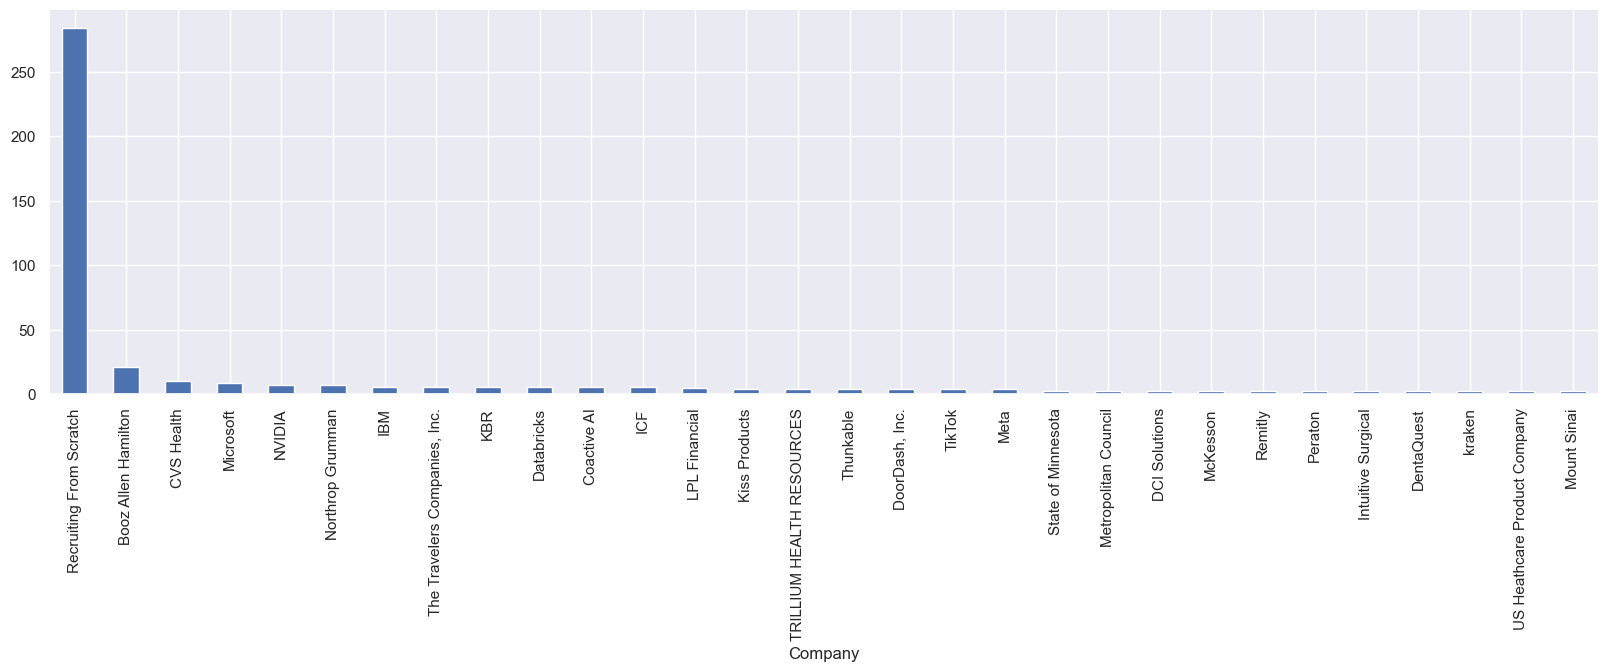

In [238]:
comp_counts = analyse_df.groupby("Company").count()['Title'].sort_values(ascending=False)[:30]
comp_counts.plot(kind='bar',figsize=(20,5))

<Axes: xlabel='Location'>

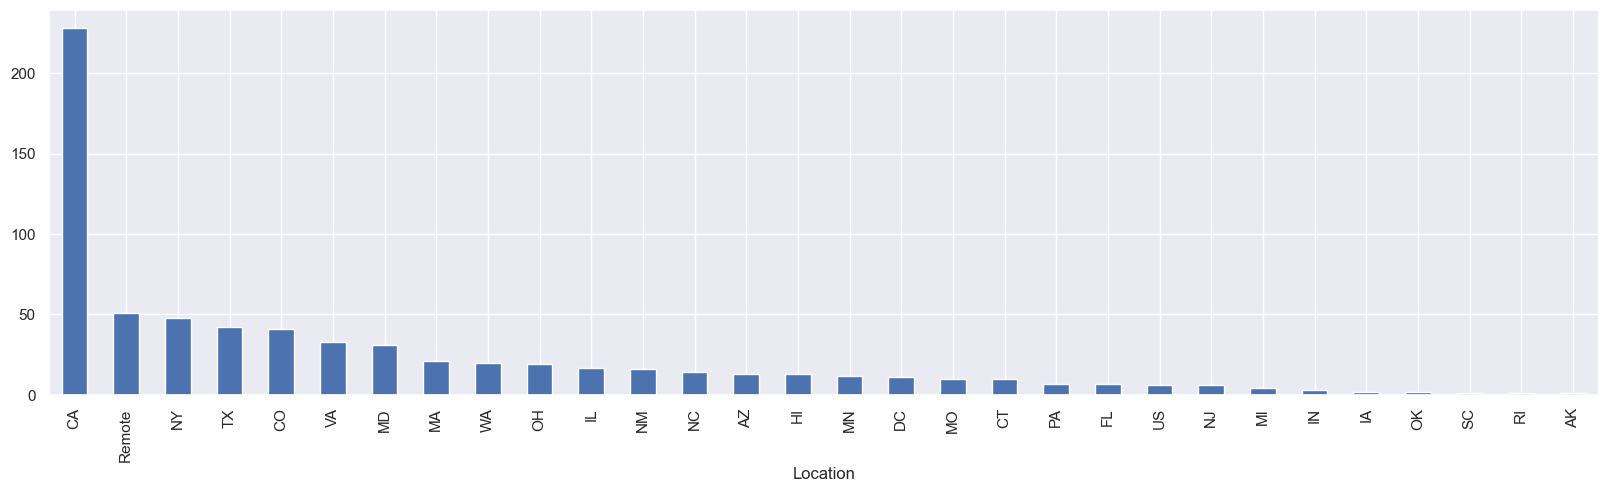

In [239]:
loc_counts = analyse_df.groupby("Location").count()['Title'].sort_values(ascending=False)[:30]
loc_counts.plot(kind='bar',figsize=(20,5))

<Axes: xlabel='Salary'>

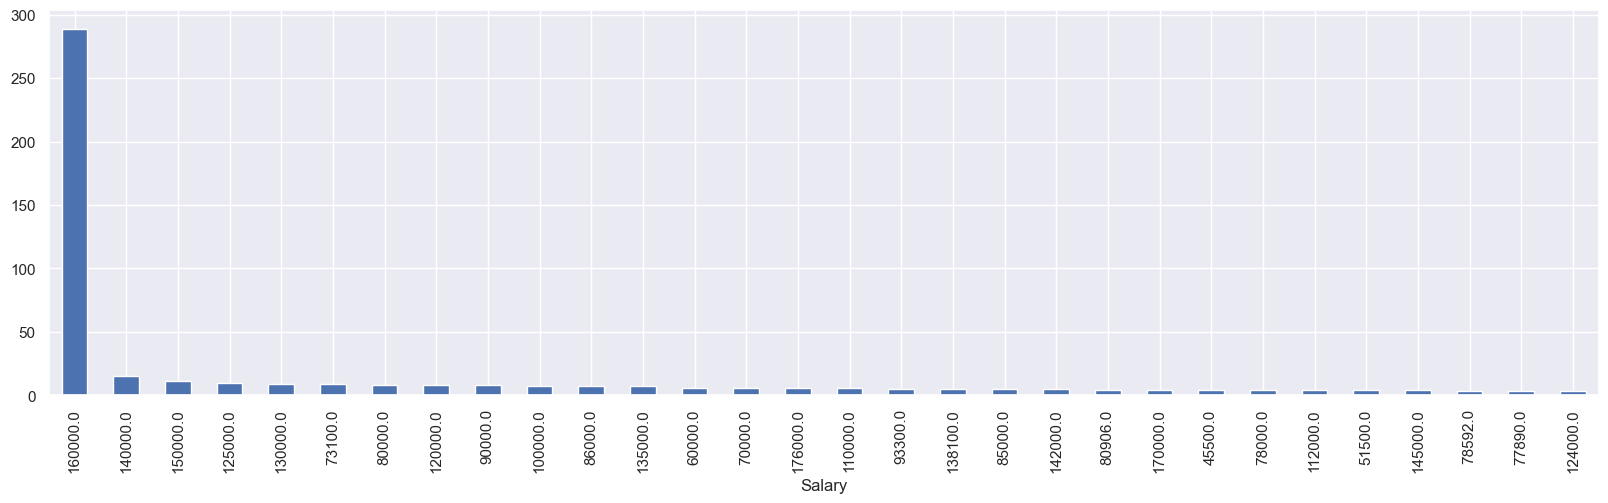

In [240]:
sal_counts = analyse_df.groupby("Salary").count()['Title'].sort_values(ascending=False).iloc[:30]
sal_counts.plot(kind='bar',figsize=(20,5))

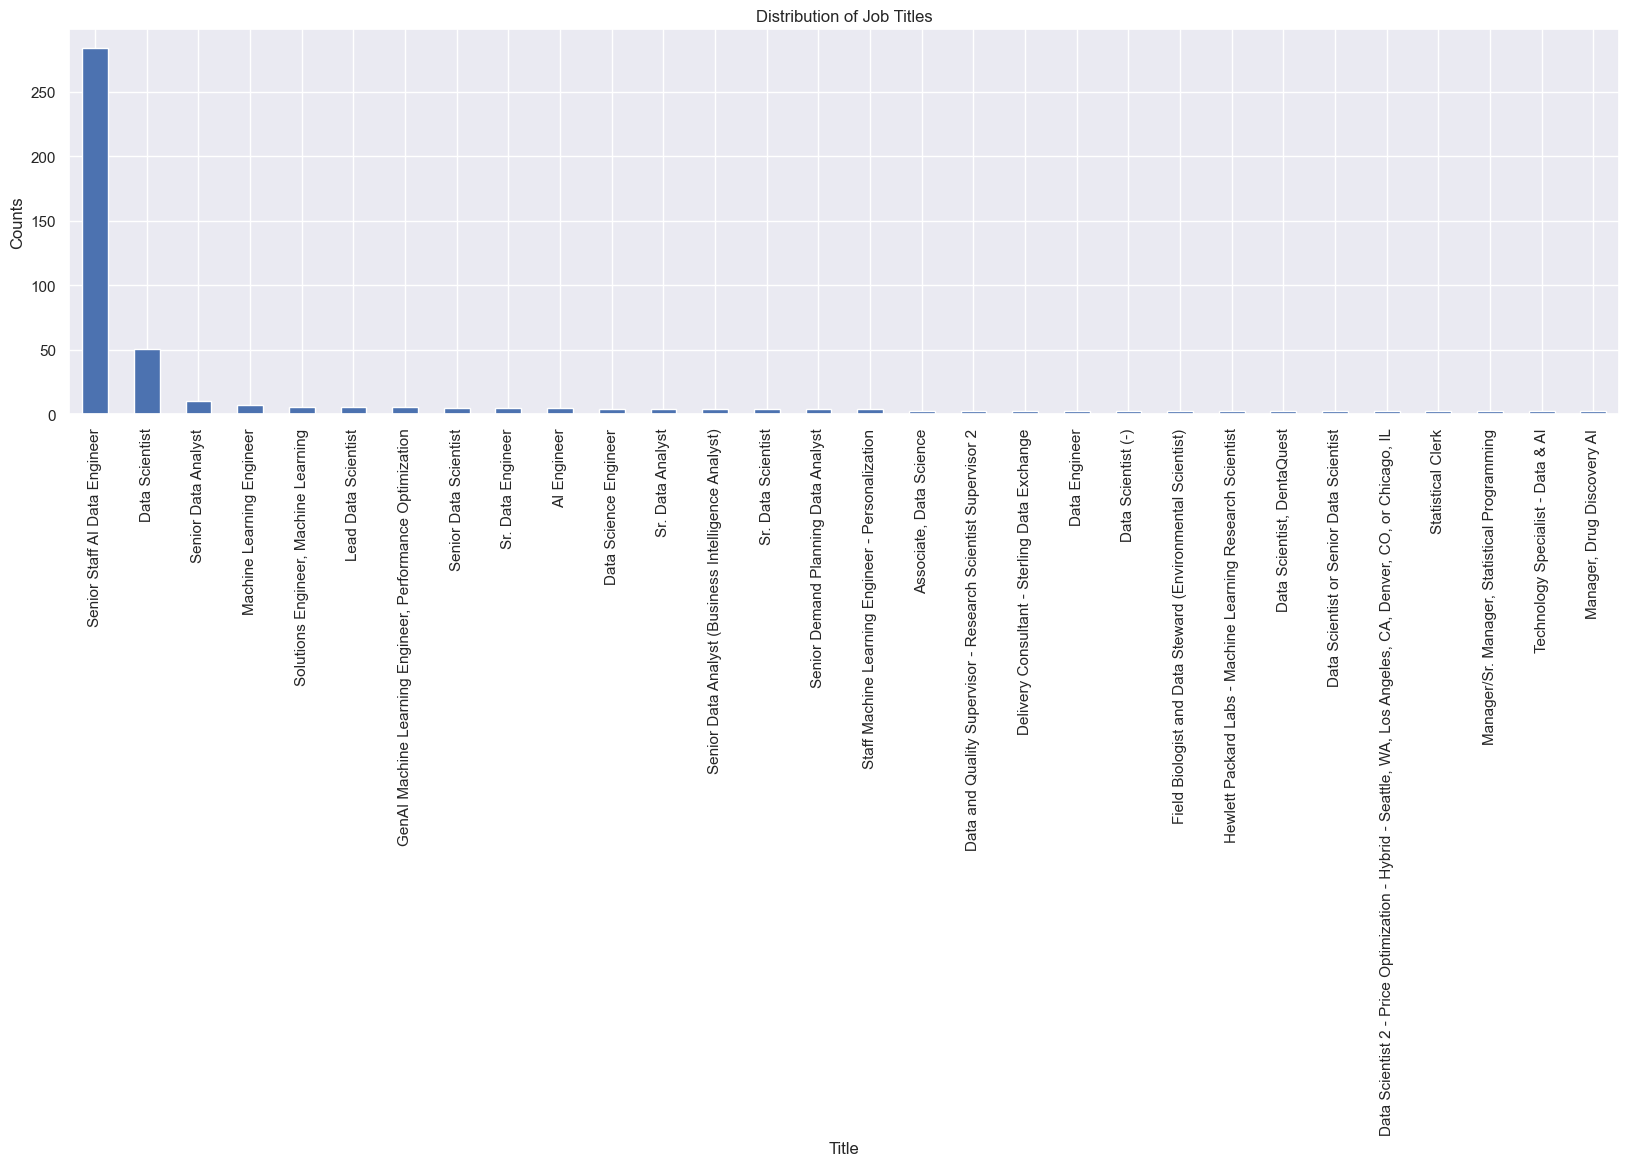

In [241]:
title_counts = analyse_df.groupby("Title").count()['Salary'].sort_values(ascending=False).iloc[:30]
title_counts.plot(kind='bar',figsize=(20,5))
plt.xlabel("Title")
plt.ylabel('Counts')
plt.title("Distribution of Job Titles")
plt.show()

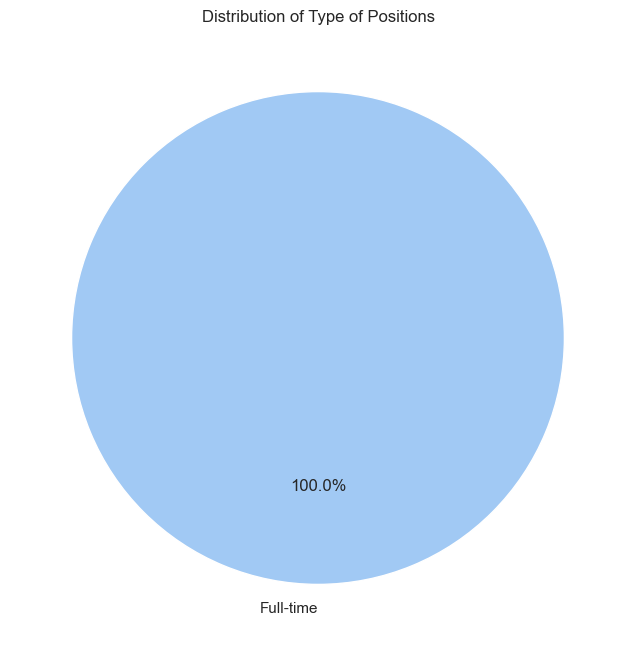

In [242]:
import seaborn as sns
type_counts = analyse_df['Type of Positions'].value_counts()
sns.set()
# Pie chart for Locations
plt.figure(figsize=(8, 8))
plt.pie(type_counts, labels=type_counts.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('pastel'))
plt.title('Distribution of Type of Positions')
plt.show()

In [243]:
analyse_df['Salary'] = pd.to_numeric(analyse_df['Salary'], errors='coerce')

In [233]:
analyse_df['Salary'].dtype

dtype('float64')

In [254]:
analyse_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 692 entries, 0 to 697
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Title              692 non-null    object 
 1   Company            692 non-null    object 
 2   Location           692 non-null    object 
 3   Type of Positions  692 non-null    object 
 4   Job Description    692 non-null    object 
 5   Salary             692 non-null    float64
dtypes: float64(1), object(5)
memory usage: 37.8+ KB


In [260]:
analyse_df['Salary'].mean()

131428.63583815028

<Axes: xlabel='Location', ylabel='Salary'>

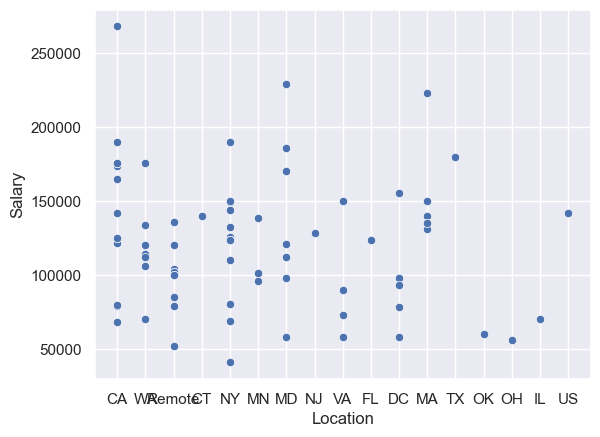

In [266]:
sns.scatterplot(y = analyse_df['Salary'][:100],x=analyse_df['Location'][:100])

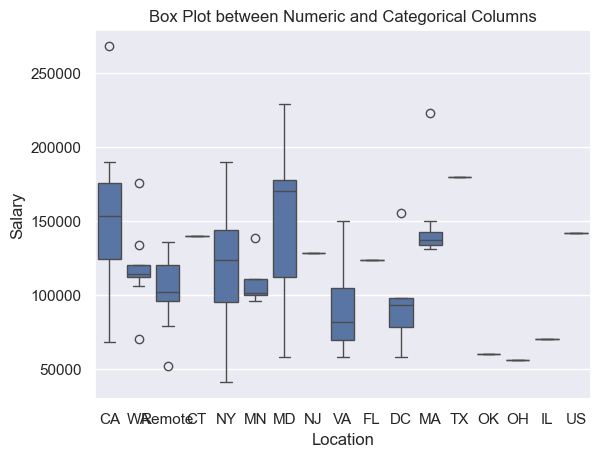

In [268]:
# Assuming 'CategoryColumn' is a categorical column
sns.boxplot(x=analyse_df['Location'][:100],y=analyse_df['Salary'][:100])
plt.title('Box Plot between Numeric and Categorical Columns')
plt.show()


In [404]:
import re


# Function to identify skills in a text
def identify_skills(text):
    text = text.lower()
    identified_skills = [skill for skill in skills_list if re.search(rf'\b{re.escape(skill)}\b', text)]
    return identified_skills




In [405]:
skills_list = ['tensorflow',
 'pytorch',
 'python',
 'numpy',
 'pandas',
 'machine learning',
 'deep learning',
 'statitics',
 'tableau',
 'aws',
 'azure',
 'docker',
 'gcp',
 'spark ml',
 'spark sql',
 'postgresql',
 'mysql',
 'nosql',
 'etl',
 'sql',
 'airflow',
 'git',
 'kafka',
 'streamlit',
 'hadoop',
 'apache spark',
 'pyspark']

In [406]:
# Apply the function to the 'Description' column
analyse_df['Identified_Skills'] = analyse_df['Job Description'].apply(identify_skills)

# Display the DataFrame with identified skills
(analyse_df[['Job Description', 'Identified_Skills']])

/var/folders/r1/qkgmsj6s3v5714p5mm648mc00000gn/T/ipykernel_2104/2849543229.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Job Description,Identified_Skills
0,\nAbout thredUP thredUP is transforming resale...,"[python, machine learning, aws, sql]"
1,"We are Vicarious, a talent agency that represe...","[python, machine learning, deep learning, aws,..."
2,Clearance Level None Category Data Science Loc...,"[machine learning, aws, azure, nosql, etl]"
3,\nBring your heart to CVS Health. Every one of...,"[python, machine learning, aws, gcp]"
4,Job Summary:\nWe are seeking an experienced Da...,"[python, machine learning, tableau, aws, sql, ..."
...,...,...
693,\n\n\nWho is \nRecruiting from Scratch \n: \n\...,"[python, pandas, machine learning, aws, azure,..."
694,\n\n\nWho is \nRecruiting from Scratch \n: \n\...,"[python, pandas, machine learning, aws, azure,..."
695,\n\n\nWho is \nRecruiting from Scratch \n: \n\...,"[python, pandas, machine learning, aws, azure,..."
696,\n\n\nWho is \nRecruiting from Scratch \n: \n\...,"[python, pandas, machine learning, aws, azure,..."


In [407]:
from collections import Counter

all_skills = [skill for skills_list in analyse_df['Identified_Skills'] for skill in skills_list]
skill_counts = Counter(all_skills)

# Display the most common skills
skill_counts

Counter({'python': 548,
         'machine learning': 532,
         'sql': 482,
         'aws': 382,
         'azure': 347,
         'gcp': 320,
         'docker': 316,
         'etl': 313,
         'git': 311,
         'kafka': 307,
         'airflow': 303,
         'nosql': 298,
         'pandas': 298,
         'pyspark': 289,
         'tableau': 85,
         'deep learning': 79,
         'tensorflow': 77,
         'pytorch': 74,
         'hadoop': 46,
         'numpy': 11,
         'apache spark': 10,
         'mysql': 8,
         'postgresql': 2,
         'spark ml': 1})

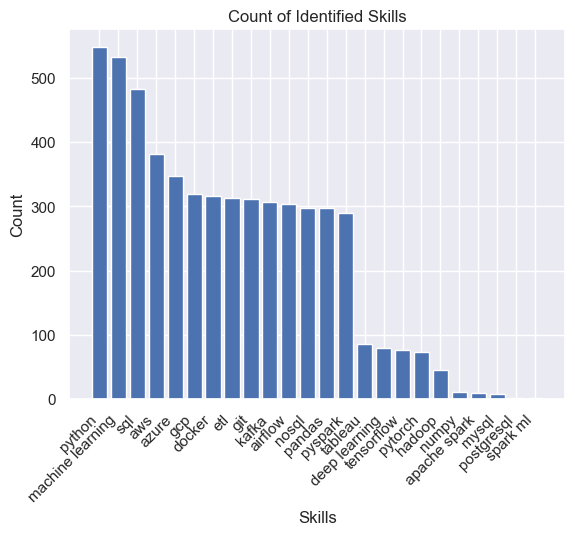

In [409]:
skill_counts_df = pd.DataFrame.from_dict(skill_counts, orient='index', columns=['Count']).sort_values(by='Count', ascending=False)

# Plotting
plt.bar(skill_counts_df.index, skill_counts_df['Count'])
plt.xlabel('Skills')
plt.ylabel('Count')
plt.title('Count of Identified Skills')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.show()

In [410]:
analyse_df.to_csv('final_job_list.csv',index=False)

In [411]:
final_job_list_df = pd.read_csv('final_job_list.csv')
final_job_list_df

,Title,Company,Location,Type of Positions,Job Description,Salary,Identified_Skills
0,"Staff Applied Scientist, Marketplace",ThredUp Inc.,CA,Full-time,\nAbout thredUP thredUP is transforming resale...,190000.0,"['python', 'machine learning', 'aws', 'sql']"
1,Prompt Engineer for Generative AI (chatbot and...,Vicarious Talent Agency,WA,Full-time,"We are Vicarious, a talent agency that represe...",70000.0,"['python', 'machine learning', 'deep learning'..."
2,Data Systems Analyst/Architect,General Dynamics Information Technology,Remote,Full-time,Clearance Level None Category Data Science Loc...,104000.0,"['machine learning', 'aws', 'azure', 'nosql', ..."
3,AIOps Principle Data Scientist,CVS Health,CT,Full-time,\nBring your heart to CVS Health. Every one of...,140000.0,"['python', 'machine learning', 'aws', 'gcp']"
4,Sr. Data Scientist,Altak Group,Remote,Full-time,Job Summary:\nWe are seeking an experienced Da...,136000.0,"['python', 'machine learning', 'tableau', 'aws..."
...,...,...,...,...,...,...,...
687,Senior Staff AI Data Engineer,Recruiting From Scratch,TX,Full-time,\n\n\nWho is \nRecruiting from Scratch \n: \n\...,160000.0,"['python', 'pandas', 'machine learning', 'aws'..."
688,Senior Staff AI Data Engineer,Recruiting From Scratch,CO,Full-time,\n\n\nWho is \nRecruiting from Scratch \n: \n\...,160000.0,"['python', 'pandas', 'machine learning', 'aws'..."
689,Senior Staff AI Data Engineer,Recruiting From Scratch,HI,Full-time,\n\n\nWho is \nRecruiting from Scratch \n: \n\...,160000.0,"['python', 'pandas', 'machine learning', 'aws'..."
690,Senior Staff AI Data Engineer,Recruiting From Scratch,CA,Full-time,\n\n\nWho is \nRecruiting from Scratch \n: \n\...,160000.0,"['python', 'pandas', 'machine learning', 'aws'..."


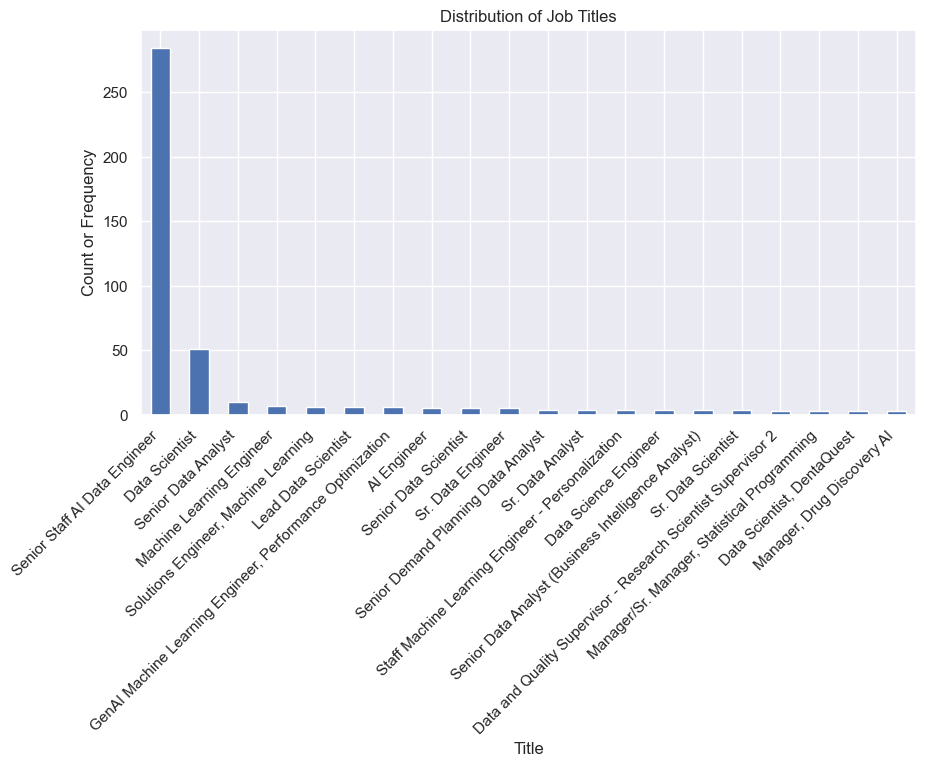

In [412]:
title_counts = final_job_list_df.groupby("Title").count()['Salary'].sort_values(ascending=False).iloc[:20]
title_counts.plot(kind='bar',figsize=(10,5))
plt.xlabel("Title")
plt.ylabel('Count or Frequency')
plt.title("Distribution of Job Titles")
plt.xticks(rotation=45, ha='right')
plt.show()

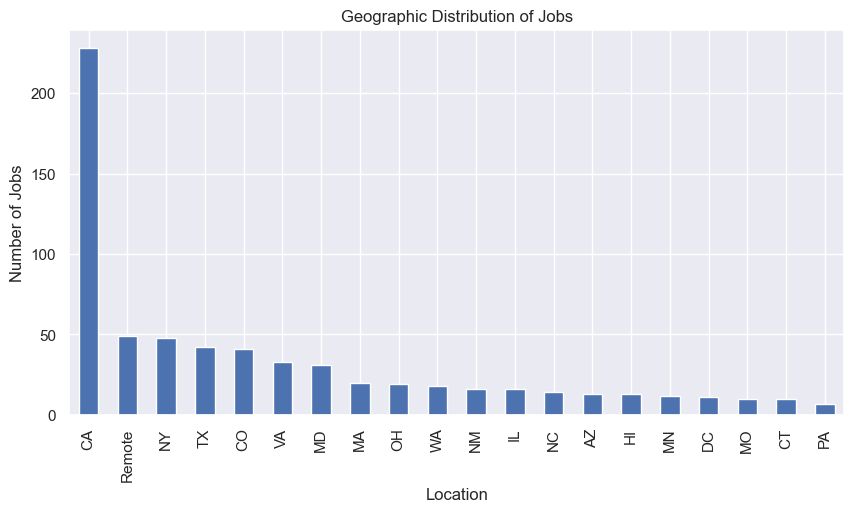

In [413]:
loc_counts = final_job_list_df.groupby("Location").count()['Title'].sort_values(ascending=False).iloc[:20]
loc_counts.plot(kind='bar',figsize=(10,5))
plt.xlabel("Location")
plt.ylabel('Number of Jobs')
plt.title("Geographic Distribution of Jobs")
plt.show()

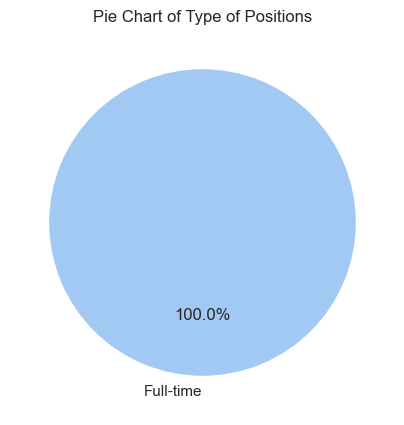

In [414]:
type_counts = final_job_list_df['Type of Positions'].value_counts()
plt.figure(figsize=(5, 5))
plt.pie(type_counts, labels=type_counts.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('pastel'))
plt.title('Pie Chart of Type of Positions')
plt.show()

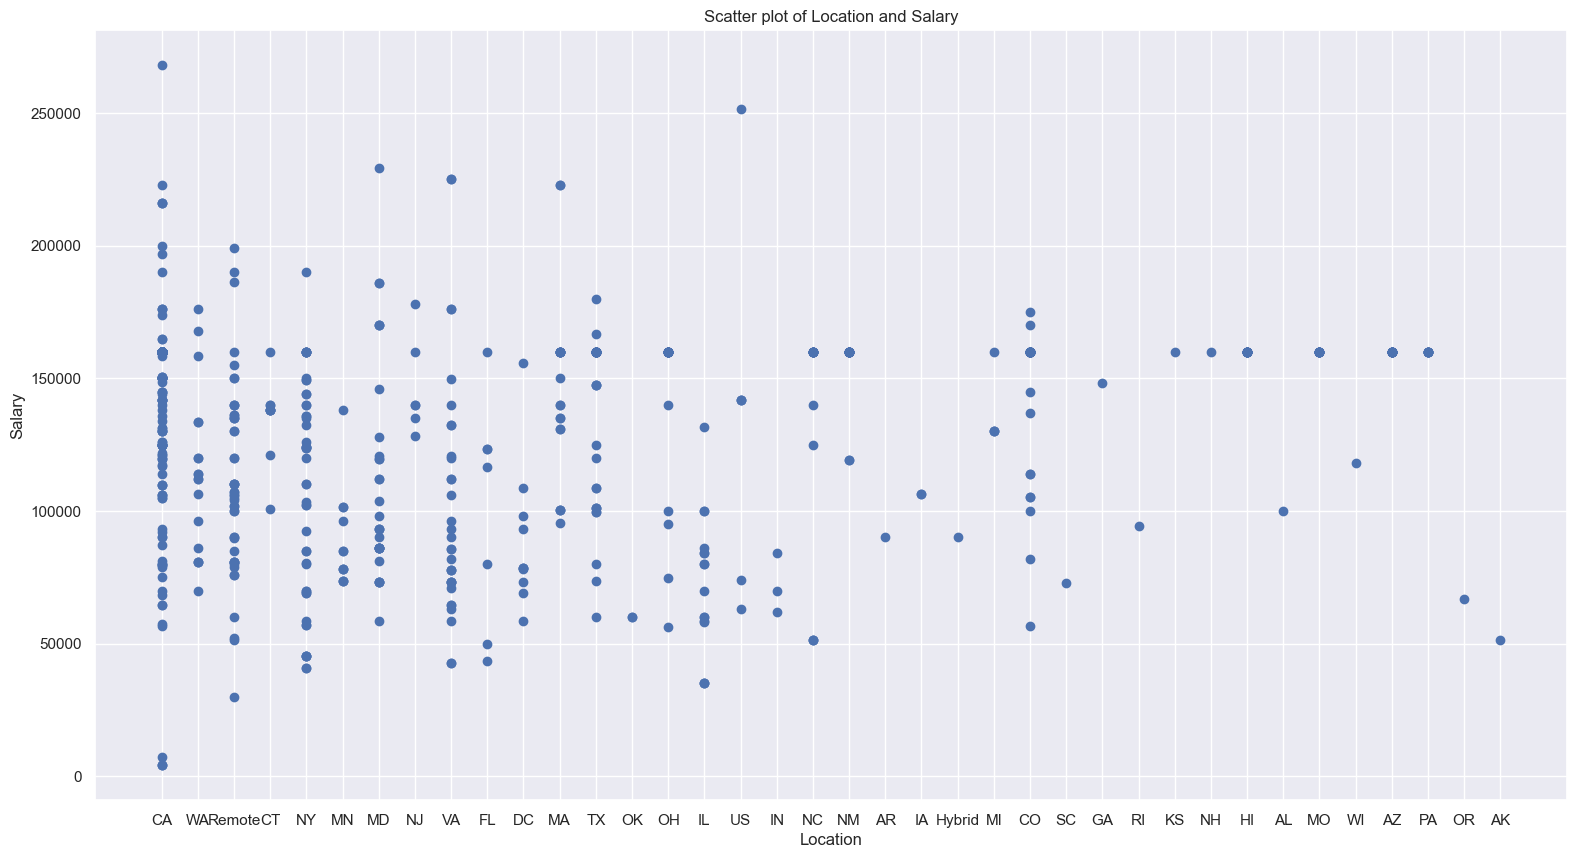

In [415]:
plt.figure(figsize=(19, 10))
plt.scatter(y=final_job_list_df['Salary'], x=final_job_list_df['Location'])
plt.title('Scatter plot of Location and Salary')
plt.xlabel("Location")
plt.ylabel('Salary')
plt.show()

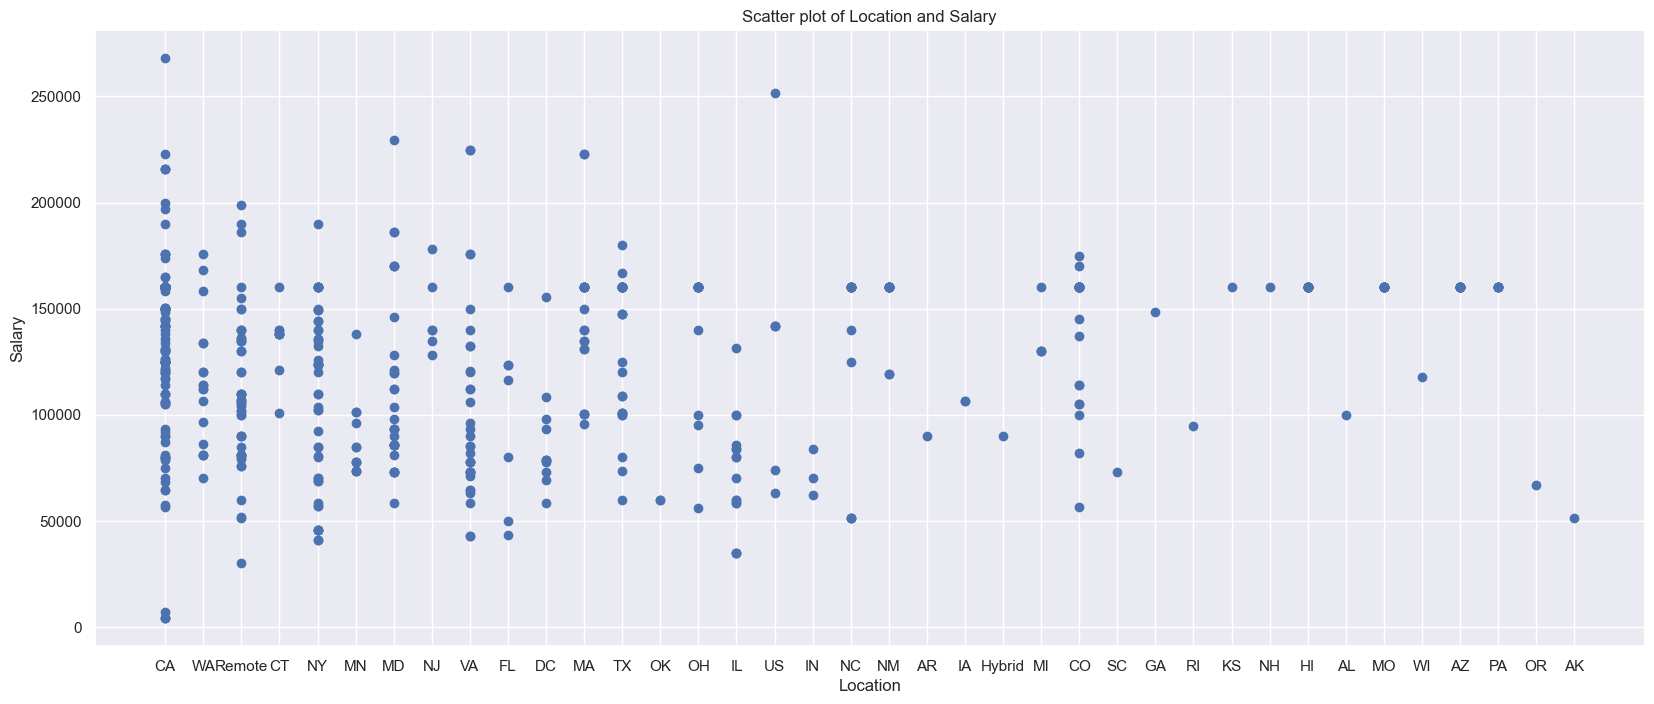

In [416]:
plt.figure(figsize=(20, 8))
plt.scatter(y=final_job_list_df['Salary'], x=final_job_list_df['Location'])
plt.title('Scatter plot of Location and Salary')
plt.xlabel("Location")
plt.ylabel('Salary')
plt.show()

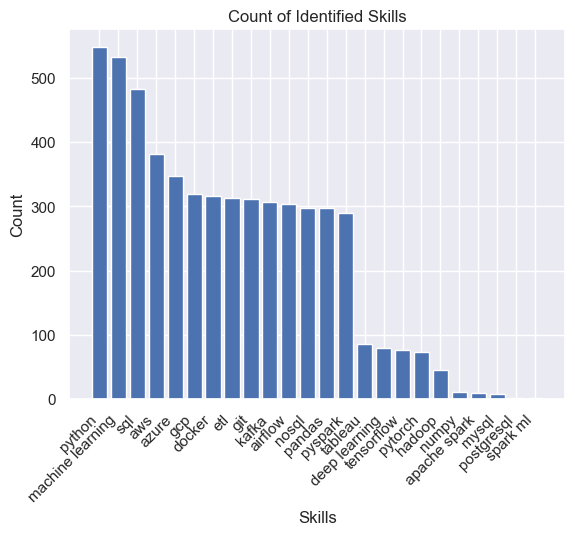

In [417]:
from collections import Counter
skills_list = ['tensorflow',
 'pytorch',
 'python',
 'numpy',
 'pandas',
 'machine learning',
 'deep learning',
 'statitics',
 'tableau',
 'aws',
 'azure',
 'docker',
 'gcp',
 'spark ml',
 'spark sql',
 'postgresql',
 'mysql',
 'nosql',
 'etl',
 'sql',
 'airflow',
 'git',
 'kafka',
 'streamlit',
 'hadoop',
 'apache spark',
 'pyspark']
all_skills = [skill for skills_list in analyse_df['Identified_Skills'] for skill in skills_list]
skill_counts = Counter(all_skills)

# Display the most common skills
skill_counts.most_common()

skill_counts_df = pd.DataFrame.from_dict(skill_counts, orient='index', columns=['Count']).sort_values(by='Count', ascending=False)

# Plotting
plt.bar(skill_counts_df.index, skill_counts_df['Count'])
plt.xlabel('Skills')
plt.ylabel('Count')
plt.title('Count of Identified Skills')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.show()

In [402]:
de_skills= ['spark ml','spark sql','postgresql','mysql','nosql','etl','sql','airflow','git','kafka','streamlit','hadoop','apache spark','pyspark']
complete_skills = skills_list + de_skills
complete_skills

['tensorflow',
 'pytorch',
 'python',
 'numpy',
 'pandas',
 'machine learning',
 'deep learning',
 'statitics',
 'tableau',
 'aws',
 'azure',
 'docker',
 'gcp',
 'spark ml',
 'spark sql',
 'postgresql',
 'mysql',
 'nosql',
 'etl',
 'sql',
 'airflow',
 'git',
 'kafka',
 'streamlit',
 'hadoop',
 'apache spark',
 'pyspark']

In [ ]:
analyse_df['Identified_Skills'] = analyse_df['Job Description'].apply(identify_skills)

# Display the DataFrame with identified skills
(analyse_df[['Job Description', 'Identified_Skills']])